
### Modeling and Evaluation Notebook

**Objectives**
- Answer business requirement 2:
    + The client is interested in predicting if a cherry tree is healthy or contains powdery mildew.

**Inputs**
- inputs/cherry_leaves_dataset/cherry-leaves/train/
- inputs/cherry_leaves_dataset/cherry-leaves/test/
- inputs/cherry_leaves_dataset/cherry-leaves/validation/
- image_embeddings

**Outputs**
- Images distribution plot in train, validation, and test set
- Image augmentation
- Class indices to change prediction inference in labels
- Machine learning model creation and training
- Save model
- Learning curve plot for model performance
- Model evaluation on pickle file
- Prediction on the random image file

**Additional Comments | Insights | Conclusions**

____________________________________________________________________________________________________


### **Set Data Directory**
__________________________________________________________________________________________

**Import libraries**

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from matplotlib.image import imread

**Set Working Directory**

In [4]:
cwd= os.getcwd()

In [5]:
os.chdir('/workspace/mildew-detection-in-cherry-leaves')
print("You set a new current directory")

You set a new current directory


In [6]:
work_dir = os.getcwd()
work_dir

'/workspace/mildew-detection-in-cherry-leaves'

**Set input directories**

Set train, validation and test paths

In [7]:
my_data_dir = 'inputs/cherry_leaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

**Set output directory**


- Organize files in a version-controlled manner
- This code is checking if a specific version of output files or directories already exists, and if it does, it suggests that a new version should be created. 
- If the version does not exist, it creates the necessary directory structure to store the files for that version.

In [8]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
  print('Old version is already available create a new version.')
  pass
else:
  os.makedirs(name=file_path)

Old version is already available create a new version.


**Set labels names**

In [9]:
labels = os.listdir(train_path)
print('Label for the images are',labels)

Label for the images are ['healthy', 'powdery_mildew']


**Set image file size embeddings**

In [10]:
version = 'v1'
image_size = joblib.load('outputs/v1/image_embeddings.joblib')
image_size

{'inputs/cherry_leaves_dataset/cherry-leaves/train/healthy/0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092.JPG': array([5.4298244e+00, 2.7398005e-04, 7.2061890e-01, ..., 3.8319865e-01,
        9.5334125e-01, 3.4293011e-01], dtype=float32),
 'inputs/cherry_leaves_dataset/cherry-leaves/train/healthy/0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_flipTB.JPG': array([6.928287  , 0.0500761 , 0.8589183 , ..., 0.5745407 , 0.35898665,
        0.03467656], dtype=float32),
 'inputs/cherry_leaves_dataset/cherry-leaves/train/healthy/002efba9-09b3-43de-93b7-5c2460185cde___JR_HL 9655.JPG': array([3.088735  , 0.01270527, 1.296147  , ..., 1.0502157 , 0.88481504,
        0.03241634], dtype=float32),
 'inputs/cherry_leaves_dataset/cherry-leaves/train/healthy/0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765.JPG': array([1.3175539 , 0.00485275, 1.8822621 , ..., 0.5286861 , 0.1618286 ,
        0.20590004], dtype=float32),
 'inputs/cherry_leaves_dataset/cherry-leaves/train/healthy/0048afb8-b950-4c57-9

____________________________________________________________________________________________________

1. **Images distribution plot in train, validation, and test set**

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




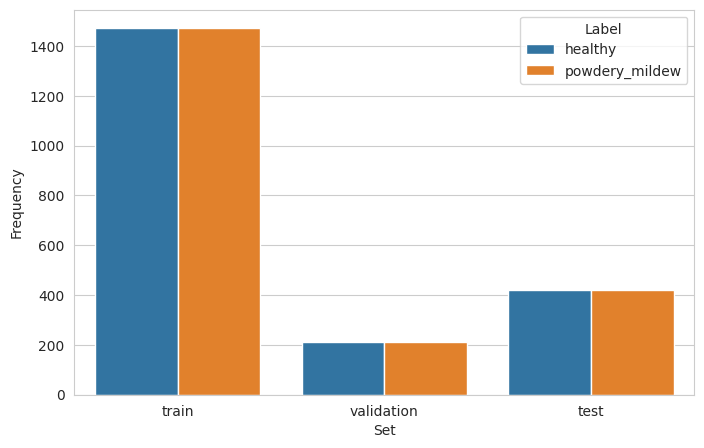

In [18]:
# Initialize a list to store the data
data = []

# Iterate through each set (train, validation, test)
for folder in ['train', 'validation', 'test']:
    # Iterate through each label within the folder
    for label in labels:
        path = os.path.join(my_data_dir, folder, label)
        if os.path.exists(path):
            # Count the number of images in each label's directory
            image_count = len(os.listdir(path)) if os.path.exists(path) else 0

        # Append a new row to the data list with the count information
        data.append({'Set': folder, 'Label': label, 'Frequency': image_count})

        # Print out the count of images for each label within each set
        print(f"* {folder} - {label}: {image_count} images")

# Print a newline for neatness in output
print("\n")

# Create the DataFrame after collecting all data
df_freq = pd.DataFrame(data)

# Set the style of the plot to 'whitegrid' for better grid visibility
sns.set_style("whitegrid")

# Create a figure for the plot with specified size
plt.figure(figsize=(8, 5))

# Generate a bar plot from the frequency DataFrame
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')

# Specify the file path to save the generated bar plot
plt.savefig(os.path.join(file_path, 'labels_distribution.png'), bbox_inches='tight', dpi=150)

# Display the plot
plt.show()


2. **Image data augmentation**

ImageDataGenerator

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-04-07 22:57:51.994802: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intiatize ImageDataGenerator

In [20]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.10,
                                   height_shift_range=0.10,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255
                              )

Augment training image dataset

In [21]:
batch_size = 32
train_set = augmented_image_data.flow_from_directory(train_path,
                                              target_size=(150, 150),
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              shuffle=True
                                              )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Augment validation image dataset

In [22]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                          target_size=(150, 150),
                                                          color_mode='rgb',
                                                          batch_size=batch_size,
                                                          class_mode='binary',
                                                          shuffle=False
                                                          )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Augment test image dataset

In [23]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                    target_size=(150, 150),
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=False
                                                    )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

3. **Plot augmented training image**

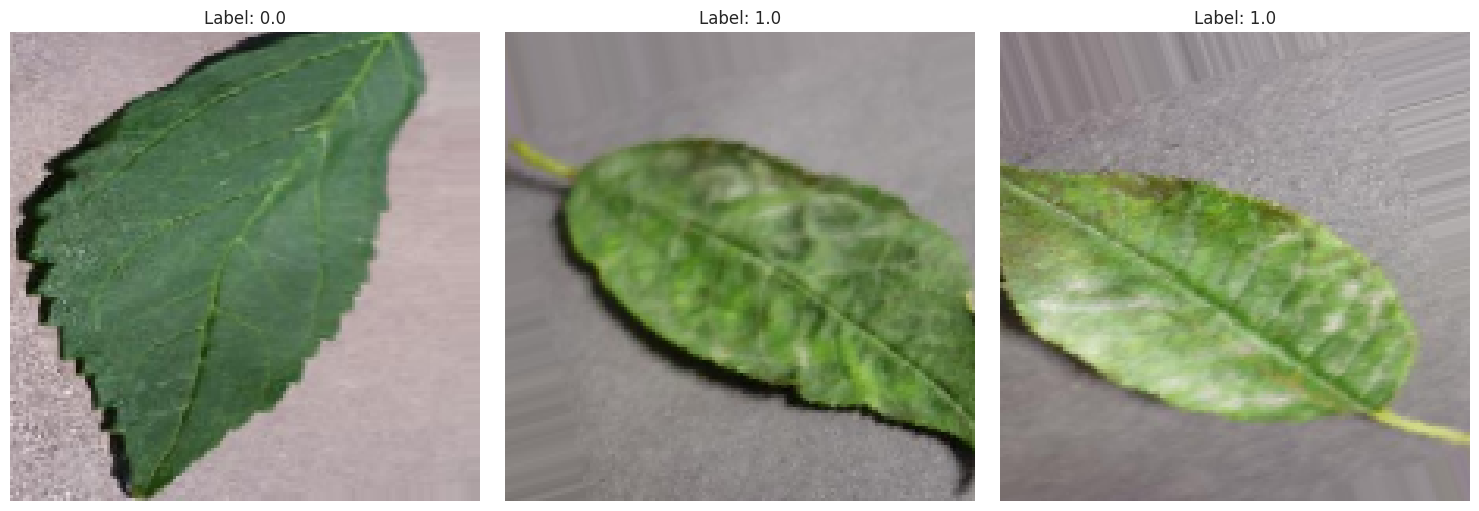

In [36]:
def plot_images(images_arr, labels_arr, num_images=3):
    """
    Take an array of images and labels, and an optional
    num_images parameter specifying how many images to plot
    """
    # Ensure not to try to plot more images than we have
    num_images = min(num_images, len(images_arr))

    # Set up the plot with one row and 'num_images' columns
    # Figure size is dynamically adjusted based on the number of images
    fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5))
    if num_images == 1:
        axes = [axes]

    # Loop through the first 'num_images' images and plot them
    for i in range(num_images):
        # Get the subplot axis
        ax = axes[i]
        # Get the image
        img = images_arr[i]
        # Get the label
        label = labels_arr[i]
        # Show the image on the subplot
        ax.imshow(img)
        # Set the title of the subplot to the image's label
        ax.set_title(f"Label: {label}")
        # Turn off the axis to only show the image
        ax.axis('off')

    # Adjust the layout so everything fits without overlapping
    plt.tight_layout()
    plt.show()

# Fetch a batch of images and labels from the train_set iterator
images, labels = next(train_set)

# Plot the first 3 images from the batch
plot_images(images, labels, num_images=3)